<a href="https://colab.research.google.com/github/cyberkutti-iedc/MLMGooglecolab/blob/main/Stock_Price_Forecasting_using_MLP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# Step 1: Import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [2]:
# Step 2: Simulate historical stock data
np.random.seed(42)
num_samples = 1000
num_features = 50  # 30 closing prices + 10 MA + volume + RSI + MACD + extra indicators
# Generate random feature matrix (you can replace with real features)
X = np.random.rand(num_samples, num_features)

# Generate target prices with some non-linear pattern
true_weights = np.random.rand(num_features)
y = X @ true_weights + np.sin(np.sum(X, axis=1)) * 10 + np.random.normal(0, 1, num_samples)


In [3]:

# Step 3: Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [4]:
# Step 4: Normalize features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [5]:
# Step 5: Build MLP model
model = Sequential([
    Dense(128, activation='relu', input_shape=(num_features,)),
    Dense(64, activation='relu'),
    Dense(32, activation='relu'),
    Dense(1, activation='linear')  # Output layer for continuous price
])

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [6]:
# Step 6: Compile model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='mean_squared_error')

In [7]:
# Step 7: Train model
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.1,
                    epochs=100,
                    batch_size=32,
                    verbose=0)

In [8]:
# Step 8: Evaluate model
y_pred = model.predict(X_test_scaled)
mse = mean_squared_error(y_test, y_pred)

7/7 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step


In [9]:

# Step 9: Results
print(f"📊 Final MSE on Test Set: {mse:.4f}")

📊 Final MSE on Test Set: 67.3397


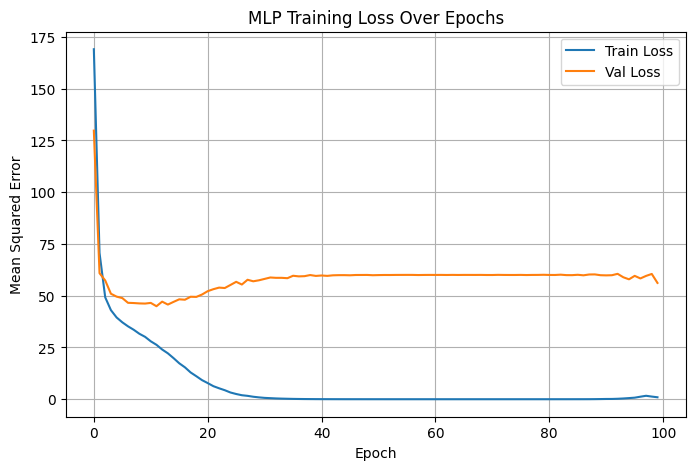

In [10]:

# Step 10: Plot training loss
plt.figure(figsize=(8, 5))
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.title("MLP Training Loss Over Epochs")
plt.xlabel("Epoch")
plt.ylabel("Mean Squared Error")
plt.legend()
plt.grid(True)
plt.show()